## QUESTION 1: Factors that impact salary
-  Data was scrapped from website, approx 1000+ rows

### [Import and Load] 

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load file
df =pd.read_csv('cf.csv')

### [EDA]
- Check if there are duplicates
-  NaN values
- Columns which ar not useful

In [3]:
#Check first 5 rows
df.head()

,Unnamed: 0,Company,Title,Address,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements
0,0,SKILLSFUTURE SINGAPORE AGENCY,"Executive, (Quality Management Division) (6-mo...","ONE MARINA BOULEVARD, 1 MARINA BOULEVARD 018989",Contract,NONE,Public / Civil Service,NONE,Roles & ResponsibilitiesResponsibilities\r\n\r...,NONE
1,1,HP PPS ASIA PACIFIC PTE. LTD.,Business Analyst,1 DEPOT CLOSE 109841,"Permanent, Full Time",Professional,Others,"$8,400to$12,900",Roles & ResponsibilitiesHP is the world’s lead...,RequirementsEducation and Experience Required:...
2,2,SHOPEE SINGAPORE PRIVATE LIMITED,Software Engineer,"GALAXIS, 1 FUSIONOPOLIS PLACE 138522","Permanent, Full Time",Executive,Information Technology,"$4,400to$8,000",Roles & ResponsibilitiesResponsibilities: De...,RequirementsRequirements: Minimum B.S. degre...
3,3,PRICEWATERHOUSECOOPERS CONSULTING (SINGAPORE) ...,Data Analytics –Manager,"MARINA ONE EAST TOWER, 7 STRAITS VIEW 018936","Permanent, Contract, Full Time",Manager,Consulting,"$6,200to$9,500",Roles & Responsibilities Advisory - Consulting...,Requirements A good Degree in a quantitative ...
4,4,Company Undisclosed,Research Fellow,NONE,"Contract, Full Time","Professional, Executive",Others,"$4,000to$5,000",Roles & ResponsibilitiesData Scientist / Progr...,Requirements Doctorate degree in a relevant fi...


In [4]:
#Drop first column
df.drop('Unnamed: 0', axis =1 ,inplace =True)

In [5]:
#Check shape after dropping first column
df.shape

(1627, 9)

In [6]:
#Check for duplicated rows
df.duplicated().sum()

214

In [7]:
#Drop the duplicates
df.drop_duplicates(inplace =True)

In [8]:
#Check shape after checking for duplicates
df.shape

(1413, 9)

In [9]:
#Check if they are any nan values
df.isna().sum()

Company           0
Title             0
Address           0
Emp_type          0
Seniority         0
Industry          0
Salary            0
Responsibility    0
Requirements      0
dtype: int64

In [10]:
#Drop rows where salary  = none as it is not useful for us
df = df[df['Salary'] !="NONE"]

In [11]:
print 'current df shape: ',df.shape

current df shape:  (1246, 9)


### [SALARY COLUMN]
-  We need to remove $ signs and also separate out the lower bound and upper bound of salary
-  Scrapped data may contain yearly and monthly salary, thus we need to clean that as well

In [12]:
#Split the salary into upper or lower bound
df['lower_bound'] = df['Salary'].apply(lambda x: x.replace('$','').replace(',','').split('to')[0])
df['upper_bound'] = df['Salary'].apply(lambda x: x.replace('$','').replace(',','').split('to')[1])

#Change them to numeric
df['lower_bound'] = df['lower_bound'].astype('int')
df['upper_bound'] = df['upper_bound'].astype('int')

#Combine both and take mean
df['mean_salary'] = (df['lower_bound'] + df['upper_bound'])/2

In [13]:
print df['mean_salary'].describe()

count      1246.000000
mean       9315.684992
std       17810.283889
min           1.000000
25%        5000.000000
50%        6500.000000
75%        9000.000000
max      300000.000000
Name: mean_salary, dtype: float64


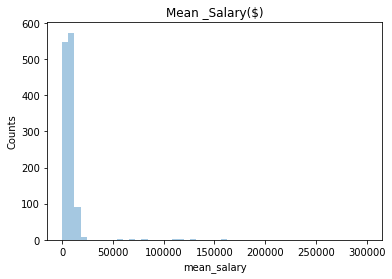

In [14]:
#Plot distribution of salary
sns.distplot(df['mean_salary'], kde = False)
plt.title('Mean _Salary($)')
plt.ylabel('Counts');

In [15]:
#Clean rows as some may be yearly salary, divide them by 12 then.

df['lower_bound'] = df['lower_bound'].map(lambda x: (x/12) if x >=18000 else x)
df['upper_bound'] = df['upper_bound'].map(lambda x: (x/12) if x >=18000 else x)
df['mean_salary'] = (df['lower_bound'] + df['upper_bound'])/2
print df['mean_salary'].describe()

count     1246.000000
mean      6880.997191
std       2776.568210
min          1.000000
25%       4900.000000
50%       6475.000000
75%       8500.000000
max      24999.500000
Name: mean_salary, dtype: float64


In [16]:
#Check for weird values,like how can min salary be $1?
df[df['lower_bound']<100]

,Company,Title,Address,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements,lower_bound,upper_bound,mean_salary
267,HNWI PRIVATE LIMITED,Digital Marketing Manager (1 Year Part Time Co...,"SINGAPORE LAND TOWER, 50 RAFFLES PLACE 048623","Part Time, Flexi work",Manager,Marketing / Public Relations,"$1to$8,000",Roles & Responsibilities Apply this job via t...,Requirements Job Application Process If you ...,1,8000,4000.5
983,HILTI ASIA PACIFIC PTE. LTD.,Territory Planning Expert,"PSA VISTA, 20 HARBOUR DRIVE 117612",Permanent,Senior Executive,Risk Management,"$5to$8,500",Roles & ResponsibilitiesYour Responsibilities ...,RequirementsFunctional Expertise Bachelor’s...,5,8500,4252.5
1622,SGTech,information technology,79 AYER RAJAH CRESCENT 139955,"Part Time, Permanent, Temporary, Contract, Fle...","Manager, Fresh/entry level, Executive, Junior ...","Engineering, Information Technology, Others, S...",$1to$1,Roles & ResponsibilitiesTalentGuru (www.talent...,"RequirementsFor more details, visit talentguru...",1,1,1.0


In [17]:
#Drop those values, since only 3 values
df = df.drop(df[df['lower_bound']<100].index)

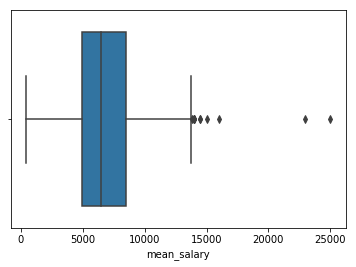

In [18]:
#Check to see if there are outliers
sns.boxplot(df['mean_salary']);

In [19]:
#Find the interquntile range
q75, q25 = np.percentile(df['mean_salary'], [75 ,25])
iqr = q75 - q25
min_q = q25 - (iqr*1.5)
max_q= q75 + (iqr*1.5)

print 'Remove rows where salary < than: ${}'.format(min_q)
print 'Remove rows where salary > than: ${}'.format(max_q)

Remove rows where salary < than: $-375.0
Remove rows where salary > than: $13825.0


In [20]:
#Remove outliers
df = df[df['mean_salary'] < 13825]

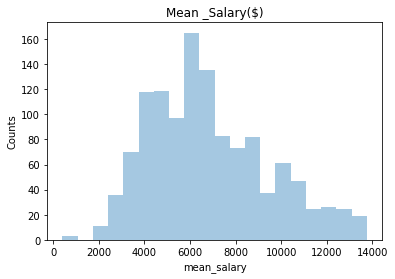

In [21]:
#Plot distribution again
sns.distplot(df['mean_salary'],kde =False)
plt.title('Mean _Salary($)')
plt.ylabel('Counts');

### [EMPLOYMENT TYPE COLUMN]
-  Try to separate out the distinct types of employment types
-  Also, remove interships as we are not interested in them

In [22]:
#Check for employment types and clean them
df['Emp_type'].unique().tolist()

['Permanent, Full Time',
 'Permanent, Contract, Full Time',
 'Contract, Full Time',
 'Full Time',
 'Permanent',
 'Contract',
 'Part Time, Full Time, Internship',
 'Permanent, Contract',
 'Part Time, Contract',
 'Contract, Freelance, Full Time, Flexi work',
 'Temporary, Contract',
 'Part Time, Permanent, Internship',
 'Internship',
 'Part Time',
 'Temporary, Contract, Full Time',
 'Part Time, Temporary, Contract, Full Time, Flexi work',
 'Temporary']

In [23]:
#Check which rows contain intership
df[df['Emp_type'].str.contains('Internship')]

#Drop those emptype that only contains internship
df = df[df['Emp_type'] != 'Internship']

In [24]:
df[df['Emp_type'].str.contains('Flexi work')] #only 1 remove them as due to it being insignificant category

df[df['Emp_type'].str.contains('Freelance')] #only 1 remove them as due to it being insignificant category

df[df['Emp_type'].str.contains('Internship')] #We remove them as we are not looking at interns

df[df['Emp_type'].str.contains('Temporary')] #only 5 remove them as due to it being insignificant category


#Thus remove Flexiwork 
df['Emp_type'] = df['Emp_type'].apply(lambda x: x.replace(', Flexi work',''))

#Thus remove Freelance 
df['Emp_type'] = df['Emp_type'].apply(lambda x: x.replace('Freelance,',''))


#Thus remove internship 
df['Emp_type'] = df['Emp_type'].apply(lambda x: x.replace(', Internship',''))

#Thus remove Temporary
df = df[df['Emp_type'] != 'Temporary'] #Drop the row which has only temporary as a category
df['Emp_type'] = df['Emp_type'].apply(lambda x: x.replace('Temporary, ','')) #Remove temporary as a category from list of categories that contain it

#Merge full and time , part and time togther for further processing for countvectorizer ltr
df['Emp_type'] = df['Emp_type'].apply(lambda x: x.replace('Part Time','PartTime'))
df['Emp_type'] = df['Emp_type'].apply(lambda x: x.replace('Full Time','FullTime'))

#This will leave us with a variation of [Permanent,Contract],[FullTime, PartTime]
#We can create columns and encode them

In [25]:
#Use count vectorizer to encode the columns of employment type
emp_type = df['Emp_type']

#import
from sklearn.feature_extraction.text import CountVectorizer

#initilaize 
cvec = CountVectorizer()

#Fit transform, make to dense so that it returns a matrix
cvec_matrix = cvec.fit_transform(emp_type).todense()

#Return feature names
cvec_columns= cvec.get_feature_names()
cvec_columns

#Make into dataframe
emp_type_df =pd.DataFrame(cvec_matrix, columns = cvec_columns)
emp_type_df.head()

,contract,fulltime,parttime,permanent
0,0,1,0,1
1,0,1,0,1
2,1,1,0,1
3,1,1,0,0
4,0,1,0,0


### [INDUSTRY COLUMN]
-  Try to separate out the unqiue industries
-  After checking, We decided to bin into top industries where industries occuring less than 5% are binned into others

In [26]:
#Check out how many unique industries are there
df['Industry'].unique()

print 'Initial Industry list(top 20)'
print ' ----------------------------'
print df['Industry'].value_counts().head(20)
##There seems to be too many unqiues for our dataset, whcih would introduce more noise than signal,lets whittle them down
##by order of top 10 industries, starting from Banking.(I did not start from IT as i believe its more general)
#Note i tried coutn vectorizer but it did not work as well, Hence im trying feature engineering

df.loc[df['Industry'].str.contains('Banking|Finance'),'Industry'] = 'Banking, Finance'
df.loc[df['Industry'].str.contains(('Sciences|Laboratory | R&D')),'Industry'] = 'Science, Research'
df.loc[df['Industry'].str.contains(('Engineering')),'Industry'] = 'Engineering'
df.loc[df['Industry'].str.contains(('Marketing|Public Realtions')),'Industry'] = 'Marketing, Public Relations'
df.loc[df['Industry'].str.contains(('Consulting')),'Industry'] = 'Consulting'
df.loc[df['Industry'].str.contains(('Advertising|Media Relations')),'Industry'] = 'Media and Advertising'
df.loc[df['Industry'].str.contains(('Accounting')),'Industry'] = 'Accounting'
df.loc[df['Industry'].str.contains(('Education|Public / Civil Service')),'Industry'] = 'Education, Public / Civil Service'
df.loc[df['Industry'].str.contains(('Information Technology')),'Industry'] = 'Information Technology'

Initial Industry list(top 20)
 ----------------------------
Information Technology                                 416
Banking and Finance                                    164
Sciences / Laboratory / R&D                             62
Engineering                                             61
Others                                                  55
Consulting                                              51
Marketing / Public Relations                            51
Advertising / Media                                     38
Banking and Finance, Information Technology             32
Human Resources                                         24
Accounting / Auditing / Taxation                        20
Education and Training                                  16
Engineering, Manufacturing                              11
Logistics / Supply Chain                                11
Education and Training, Public / Civil Service          11
Engineering, Information Technology                    

Feature Engineered List
 ----------------------------
Information Technology         435
Others                         256
Banking, Finance               227
Engineering                     93
Marketing, Public Relations     76
Science, Research               73
Consulting                      68
Name: Industry, dtype: int64


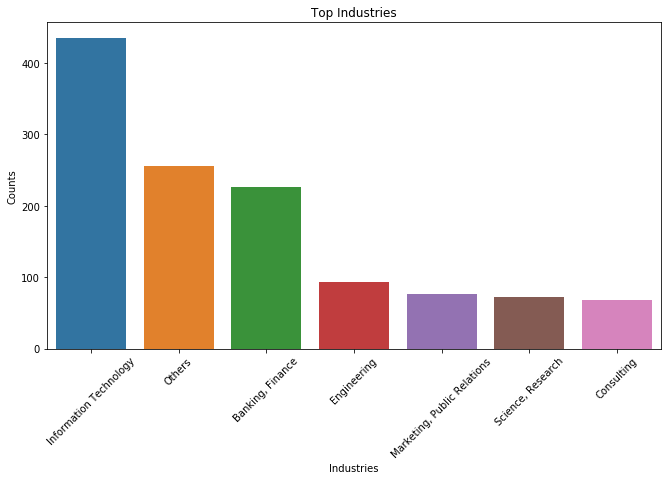

In [27]:
ind_count = df['Industry'].value_counts()

#Change values that appear less than 5% to 'others'
low_counts = ind_count.index[ind_count < df.shape[0]*0.05]
df.loc[df['Industry'].isin(low_counts), "Industry"] = 'Others'


print 'Feature Engineered List'
print ' ----------------------------'
print df['Industry'].value_counts()

#plot top Industries

plot =  df['Industry'].value_counts()
fig, ax = plt.subplots(figsize=(11,6))
g = sns.barplot(plot.index, plot.values)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.title('Top Industries')
plt.xlabel('Industries')
plt.ylabel('Counts')
plt.show();

In [28]:
#make dummies
industry_df = pd.get_dummies(df['Industry'])
industry_df.shape

#Reset the index
industry_df = industry_df.reset_index(drop = True)

### [SENIORITY TYPES COLUMN]
-  Separate out into distinct seniority

In [29]:
#Count frequency of the seniority
df['Seniority'].unique().tolist()
# for i in df['Seniority'].unique().tolist():
#     print 'Count:', i, df[df['Seniority']== i]['Seniority'].count()
    
#Replace all blanks with '', so that easier for countvectorizer
df['Seniority'] = df['Seniority'].apply(lambda x: x.replace(' ',''))

#Remove '-' and '/' so that easier for countvectorizer
df['Seniority'] = df['Seniority'].apply(lambda x: x.replace('-',''))
df['Seniority'] = df['Seniority'].apply(lambda x: x.replace('/',''))

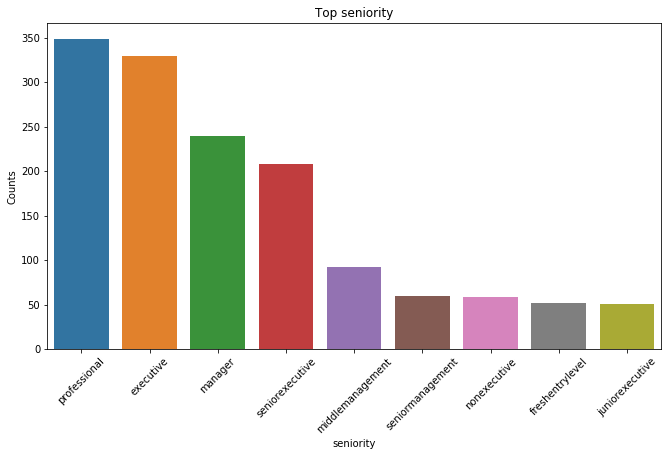

In [30]:
#Use count vectorizer to encode the columns of Seniority type
seniority = df['Seniority']

#import
from sklearn.feature_extraction.text import CountVectorizer

#initilaize 
snr_cvec = CountVectorizer(stop_words ='english')

#Fit transform, make to dense so that it returns a matrix
snr_cvec_matrix = snr_cvec.fit_transform(seniority).todense()

#Return feature names
snr_cvec_columns= snr_cvec.get_feature_names()

#Make into dataframe
seniority_df =pd.DataFrame(snr_cvec_matrix, columns = snr_cvec_columns)
seniority_df.head()

#plot seniority
seniority = seniority_df.sum().sort_values(ascending = False)
plot = pd.DataFrame(seniority)
fig, ax = plt.subplots(figsize=(11,6))
g = sns.barplot(plot.index, plot[0])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.title('Top seniority')
plt.xlabel('seniority')
plt.ylabel('Counts')
plt.show();

### [TITLE COLUMN]
- Separate out into distinct titles
- As we found that are too many titles, we identified top words in titles instead

In [31]:
#Check out types of titles 
df['Title'].unique().tolist()

['Business Analyst',
 'Software Engineer',
 'Data Analytics \xe2\x80\x93Manager',
 'Research Fellow',
 'Application Support Analyst, Reference Data Team',
 'CyberSecurity Business Resiliency Analyst and Coordinator, Vice President',
 'Software Engineer (Ref 21711)',
 'Murex Technical Migration Consultant',
 'Analytics Director',
 'Senior Business Analyst',
 'Senior Engineer, DCIM ( Data Center Infrastructure Management )',
 'Digital Relationship Manager',
 'Associate, Compliance, Conflicts of Interest & Conduct Monitoring',
 'Associate Director',
 'System Analyst (GIS)',
 'Research Engineer (Human Language Technology)  /  I2R (A*STAR)',
 'Copywriter',
 'BII - Research Officer (Machine Learning and Computational Biology)',
 'Cloud Solution Architect',
 'Junior Backend Developer',
 'BAU Analyst and Support',
 'Web Designer',
 'IT Business Analyst (Cyber Security,IAM)',
 'Business Intelligence (Qlikview) Executive',
 'High-Performance Data Engineer',
 'Research Assistant',
 'Executive Ass

(1228L, 50L)
analyst              354
business             285
data                 273
senior               206
manager              206
business analyst     202
engineer             172
analytics            117
scientist             99
research              76
associate             72
data scientist        69
developer             67
software              61
digital               57
marketing             52
consultant            51
singapore             46
lead                  45
technology            45
executive             44
data analytics        43
software engineer     42
data analyst          40
management            39
dtype: int64


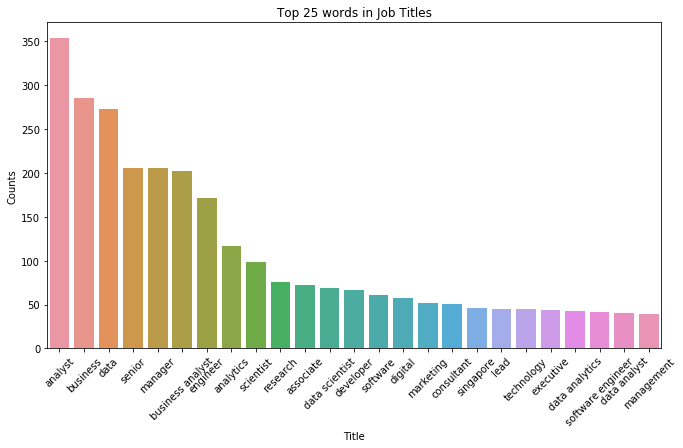

In [32]:
#Check which are the most occuring words

#
X_title = df['Title']

#initilaize 
stopword_list =[]
cvec = CountVectorizer(stop_words ='english',ngram_range = (1,2),max_features = 50)

#Fit and return a matrix using 'todense'
cvec.fit(X_title)
cvec_matrix = cvec.transform(X_title).todense()

#return features_names
cvec_columns= cvec.get_feature_names()

#Make into a dataframe
print cvec_matrix.shape
title_df = pd.DataFrame(cvec_matrix, columns = cvec_columns)

#Check to see most frequent words
most_frequent_words = title_df.sum().sort_values(ascending =False).head(25)
print most_frequent_words

#Plot top  25
plot = pd.DataFrame(most_frequent_words)
fig, ax = plt.subplots(figsize=(11,6))
g = sns.barplot(plot.index, plot[0])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.title('Top 25 words in Job Titles')
plt.xlabel('Title')
plt.ylabel('Counts')
plt.show();

### [RESPONSIBILITY COLUMN] 
- Use count vectorizer to find out top words in repsonsibilites

(1228L, 1000L)
data           3222
business       2779
team           1708
work           1282
analytics      1199
management     1196
support        1161
development     935
project         844
solutions       827
design          810
develop         777
teams           744
new             733
ensure          728
marketing       726
analysis        693
product         684
experience      675
technology      671
provide         662
projects        646
research        603
digital         580
role            558
dtype: int64


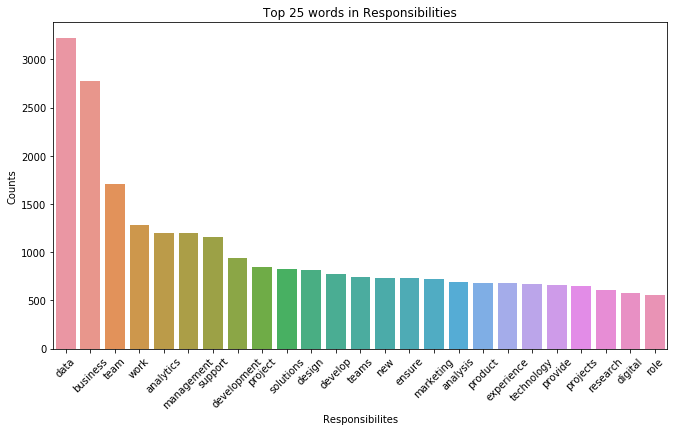

In [33]:
#Vectorize them
Resp_cvec = CountVectorizer(df['Responsibility'])

#initilaize
from sklearn.feature_extraction import text #import this to add stop words
my_additional_stop_words =('responsibilities','roles','requirements')
Resp_cvec = CountVectorizer(stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words),ngram_range = (1,2),max_features = 1000)

#Fit and return a matrix using 'todense'
Resp_cvec.fit(df['Responsibility'])
Resp_cvec_matrix = Resp_cvec.transform(df['Responsibility']).todense()

#return features_names
Resp_cvec_columns= Resp_cvec.get_feature_names()

#Make into a dataframe
print Resp_cvec_matrix.shape
Resp_df = pd.DataFrame(Resp_cvec_matrix, columns = Resp_cvec_columns)

#Check to see most frequent words
most_frequent_words = Resp_df.sum().sort_values(ascending =False).head(25)
print most_frequent_words

#Plot top  25
plot = pd.DataFrame(most_frequent_words)
fig, ax = plt.subplots(figsize=(11,6))
g = sns.barplot(plot.index, plot[0])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.title('Top 25 words in Responsibilities')
plt.xlabel('Responsibilites')
plt.ylabel('Counts')
plt.show();

### [REQUIREMENTS COLUMN]
- Use count vectorizer to find out top words in requirments

(1228L, 1000L)
experience       3635
skills           1850
data             1679
business         1259
strong           1215
management       1134
knowledge        1129
ability          1011
years            1007
working           869
work              843
team              703
degree            698
good              673
communication     664
development       655
science           505
excellent         494
computer          490
analytics         486
understanding     480
analysis          477
tools             474
project           468
related           441
dtype: int64


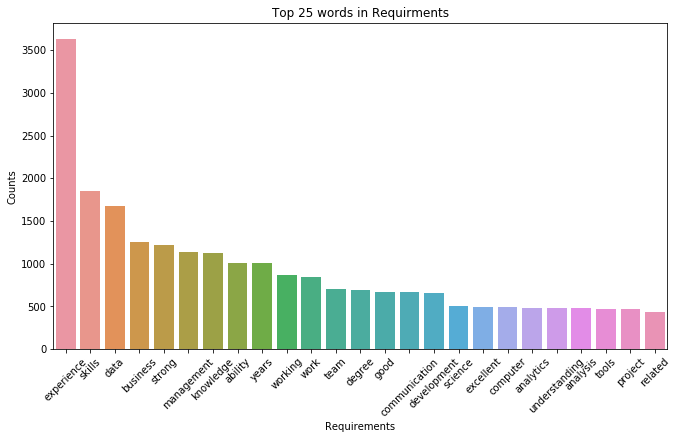

In [34]:
#Vectorize them
Req_cvec = CountVectorizer(df['Requirements'],)

#initilaize
my_additional_stop_words =('responsibilities','roles','requirements')
Req_cvec = CountVectorizer(stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words),ngram_range = (1,2),max_features = 1000)

#Fit and return a matrix using 'todense'
Req_cvec.fit(df['Requirements'])
Req_cvec_matrix = Req_cvec.transform(df['Requirements']).todense()

#return features_names
Req_cvec_columns = Req_cvec.get_feature_names()

#Make into a dataframe
print Req_cvec_matrix.shape
Req_df = pd.DataFrame(Req_cvec_matrix, columns = Req_cvec_columns)

#Check to see most frequent words
most_frequent_words = Req_df.sum().sort_values(ascending =False).head(25)
print most_frequent_words

#Plot top  25
plot = pd.DataFrame(most_frequent_words)
fig, ax = plt.subplots(figsize=(11,6))
g = sns.barplot(plot.index, plot[0])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.title('Top 25 words in Requirments')
plt.xlabel('Requirements')
plt.ylabel('Counts')
plt.show();

### [Regression]
**I attempted to find the best features to predict salary based on 4 factors first as a baseline:**
-  Seniority
-  Title
-  Industry
-  Emp_type



In [35]:
print df.shape
df = df.reset_index(drop =True)
print df.shape

(1228, 12)
(1228, 12)


In [36]:
#Use job seniority, title and emp type as predictors, mean_salry as target
X = pd.concat([emp_type_df, seniority_df, title_df, industry_df ],axis =1)
y = df['mean_salary']

In [37]:
#import and split data into train and test set
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

C:\Users\Tan Kian How\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
#K-best
from sklearn.feature_selection import SelectKBest, f_regression
skb_f = SelectKBest(f_regression, k=10)
skb_f.fit_transform(X_train, y_train)


#for feature, score, pvalue in zip(X_train.columns, skb_f.scores_,skb_f.pvalues_):
#    print feature,score,pvalue

#Print your k-best
X_f_col = np.array(X_train.columns[skb_f.get_support(True)]) #select chosen column, true gives column index
print 'f_features:'
print X_f_col,'\n'

f_features:
[u'executive' u'freshentrylevel' u'juniorexecutive' u'manager'
 u'seniormanagement' u'director' u'executive' u'lead' u'manager'
 'Banking, Finance'] 



In [39]:
#lasso feature selection
#lasso requires standardization first
from sklearn.preprocessing import StandardScaler
X_train_ss = StandardScaler().fit_transform(X_train)
X_train_ss

from sklearn.linear_model import LassoCV

optimal_lasso = LassoCV(n_alphas=500, cv=10) #LassoCV decide what alphas to use, just set no. of alphas to test.
optimal_lasso.fit(X_train_ss, y_train)

coefs = list(zip(X_train.columns.values, optimal_lasso.coef_))
coefs = pd.DataFrame.from_records(coefs)
coefs['abs'] = abs(coefs[1])

X_lasso_col = coefs[coefs['abs'] != 0].sort_values('abs', ascending=False)
X_lasso_col = np.array(X_lasso_col.iloc[:,0])

#print the chosen ones
print 'X_lasso_col:'
print X_lasso_col

X_lasso_col:
[u'juniorexecutive' 'Banking, Finance' u'director' u'lead' u'manager'
 u'executive' 'Information Technology' u'singapore' u'executive'
 u'freshentrylevel' u'senior' u'seniormanagement' 'Others' u'manager'
 u'software engineer' u'scientist' u'development' u'engineer' u'research'
 u'contract' u'avp' u'developer' u'data analyst' u'banking'
 u'project manager' u'associate' 'Engineering' u'data analytics'
 u'specialist' u'architect' u'parttime' u'digital' 'Consulting'
 'Marketing, Public Relations' u'finance' u'business analyst'
 u'nonexecutive' 'Science, Research' u'senior manager' u'marketing'
 u'intelligence' u'assistant']


In [40]:
#RFECV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
selector = RFECV(estimator=lr, cv=10)
selector.fit(X_train, y_train)


list(zip(X_train.columns.values, selector.support_, selector.ranking_)) #print variables, selection and ranks -> rank 1 is the best
X_RFECV_col = np.array(X_train.columns[selector.support_]) #select chosen column from TRUE

#print the chosen ones
print 'recursive_features:'
print X_RFECV_col,'\n'

recursive_features:
[u'parttime' u'executive' u'freshentrylevel' u'juniorexecutive' u'manager'
 u'seniormanagement' u'architect' u'avp' u'banking' u'big' u'big data'
 u'business' u'business analyst' u'business intelligence' u'data analyst'
 u'data analytics' u'developer' u'development' u'digital' u'director'
 u'executive' u'finance' u'i2r star' u'intelligence' u'lead' u'manager'
 u'marketing' u'project' u'project manager' u'research' u'scientist'
 u'senior' u'senior business' u'singapore' u'software'
 u'software engineer' u'specialist' u'vp' 'Banking, Finance' 'Consulting'
 'Engineering' 'Information Technology' 'Marketing, Public Relations'
 'Others' 'Science, Research'] 



In [41]:
#Compare all models
from sklearn.model_selection import cross_val_score

# Defining a function to test our best features head to head.
lr = LinearRegression()

def score(X):
    scores = cross_val_score(lr, X, y_train, cv=5)
    return scores.mean(), scores.std()

# A list of all of our lists of best features being executed in the score function.
all_scores = [
    score(X_train[X_f_col]),
    score(X_train[X_RFECV_col]),
    score(X_train[X_lasso_col]),
    score(X_train)]

# Putting results into a DataFrame.
pd.DataFrame(all_scores, columns=['mean score', 'std score'], index = ['kbest', 'rfecv', 'lasso', 'all'])

,mean score,std score
kbest,0.229626,0.050058
rfecv,0.191852,0.167627
lasso,0.287562,0.077324
all,0.258998,0.076764


### [Thoughts]:
-  We see that rfecv performs the best, but the score is still pretty low. Thus we try to add 'Industry' and 'Responsibilty' to the predictors.

-  We can use lasso as there is not much of a difference in score and also lasso allows us to play with sparse features as feature selection

In [42]:
#Attempt to put all togther using lasso
X = pd.concat([emp_type_df, seniority_df, title_df, industry_df, Resp_df, Req_df ],axis =1)
y = df['mean_salary']
print 'Predictors(X): ',X.shape
print 'Target(y): ',y.shape
print '--------------------------------------'

#Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
ss_X_train = scaler.transform(X_train)
ss_X_test = scaler.transform(X_test)

#Run lasso
from sklearn.linear_model import Lasso
#Apply lasso
# #Setting alpha to 0 will be equal to ordinary least squares,hence i should achieve the same result.Apply best alpha after gridsearch
ls = Lasso(alpha = 150)

#10 cross-validation on lasso
from sklearn.cross_validation import cross_val_score
lsscore = cross_val_score(ls, ss_X_train, y_train, cv= 10)
print '10 fold Training accuracy scores: ', lsscore, 'Mean: ', lsscore.mean()
print '--------------------------------------'

#Get the score of prediction
ls.fit(ss_X_train, y_train)
print 'Predicted R2 scores:', ls.score(ss_X_test, y_test)
print '--------------------------------------'

#Tune hyperparameters to see if we can increase the score
from sklearn.model_selection import GridSearchCV
alpha = [50,75,90,100]

params = dict(alpha = alpha)
ls_grid_search = GridSearchCV(Lasso(),params,cv =10,verbose =1 )
ls_grid_search.fit(ss_X_train, y_train)

#Get the best score
print 'best_score:', ls_grid_search.best_score_
print '--------------------------------------'

#Get best estimator
best_estimator = ls_grid_search.best_estimator_
print 'best estimator', best_estimator
print '--------------------------------------'

predictions = ls_grid_search.predict(ss_X_test)
print 'predicted R2 with best hyperparamter:', ls_grid_search.score(ss_X_test, y_test)


Predictors(X):  (1228, 2070)
Target(y):  (1228L,)
--------------------------------------
10 fold Training accuracy scores:  [0.24133392 0.14959628 0.3587649  0.43789502 0.36845085 0.25720815
 0.26415985 0.33296748 0.36711839 0.32063055] Mean:  0.30981253853149776
--------------------------------------
Predicted R2 scores: 0.3549845583218476
--------------------------------------
Fitting 10 folds for each of 4 candidates, totalling 40 fits
best_score: 0.34813503613388314
--------------------------------------
best estimator Lasso(alpha=90, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
--------------------------------------
predicted R2 with best hyperparamter: 0.3853339685989353


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    4.9s finished


### [Conclusion:]
-  It would seem like there is not much difference before and after adding the responsibility and requirments column
-  Also, I believe the score is bad as there are not enough data points. Perhaps we can try doing a classification method to predict high/medium/low salary instead 

### [Classification]

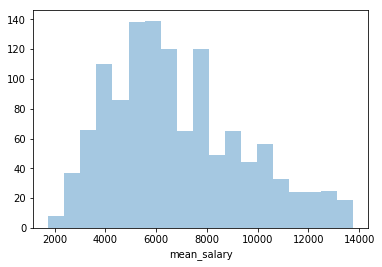

In [43]:
#Plot the salary distribution again
sns.distplot(df['mean_salary'],kde =False);

In [44]:
#Use pd.cut to bucket into 3 categories and assign labels to them
df['salary_category'] = pd.cut(df['mean_salary'], 3,labels=['low', 'med', 'high'])

#Use pd factorize to convert into digits so that sklearn can understand
#factorize returns a tuple where index 0 contains the digits 
factor = pd.factorize(df['salary_category'])
df['salary_category_factorized'] = factor[0]
definitions = factor[1]

In [45]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics


#Define my X and y
X = pd.concat([emp_type_df, seniority_df, title_df, industry_df],axis =1)
y = df['salary_category_factorized']

# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

# We have to scale the predictors by Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


print " First model('Random Forrest)'s Accuracy:",metrics.accuracy_score(y_test, y_pred)



 First model('Random Forrest)'s Accuracy: 0.6384364820846905


No handlers could be found for logger "matplotlib.legend"


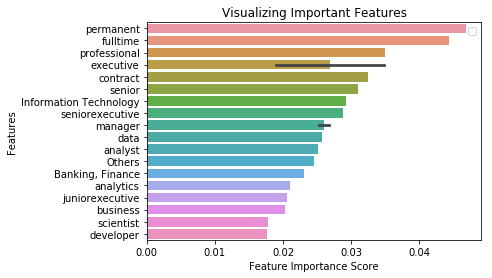

In [46]:
#Check out the most important predictors
feature_imp = pd.Series(classifier.feature_importances_,index= X.columns).sort_values(ascending=False)
feature_imp.head(20)

# Creating a bar plot for top 20 features
sns.barplot(x=feature_imp.head(20), y=feature_imp.head(20).index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Make my pipeline to tune hyperparameters

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

#Define my estimators
estimators = [('scaler', StandardScaler()),('clf', RandomForestClassifier())]
pipe = Pipeline(estimators)

#Attributes of named_steps map to keys, can use it for grid search to tune hyperparamters
#Use pipe.get_params to see tunable paramters
param_grid = {'clf__n_estimators': [10,50,100]}

#Cross-validated grid search
gs = GridSearchCV(pipe, param_grid = param_grid,refit =True)#Make sure refit is true to ensure that best parameters will be used
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
     ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__n_estimators': [10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
# #Results
# print '-----------------------------'
# best_estimator = gs.best_estimator_
# print best_estimator
# print '-----------------------------'
# best_parameters = gs.best_params_
# print best_parameters
# print '-----------------------------'
best_score = gs.best_score_
print 'Best score:', best_score

Best score: 0.5537459283387622


In [49]:
y_pred = gs.predict(X_test)

In [50]:
metrics.accuracy_score(y_test, y_pred)

0.6384364820846905

Salary: 0 = Low, 1 = medium, 2 = High


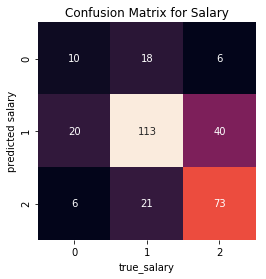

In [61]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square =True, annot =True, fmt = 'd',cbar =False)
plt.xlabel('true_salary')
plt.ylabel('predicted salary');
plt.title('Confusion Matrix for Salary')

print 'Salary: 0 = Low, 1 = medium, 2 = High'

### {CONCLUSION}
-  While we are not able to get a good model for regression, we have an average model for the classifcation of categories of salary**

-  I believe that our models are not doing well due to the small datasets

- Hence we should consider getting more data


## QUESTION 2: Factors that distinguish job category
- I am interested to know what factors differentiates between an anaylst or a scientist in the field of data!

**Prepare my data**

In [62]:
A_count = df[df['Title'].str.contains('Analyst')]['Title'].count()
print  'Analyst in Title:', A_count

S_count = df[df['Title'].str.contains('Scientist')]['Title'].count()
print 'Scientist in Title:', S_count

#Check if there are overlaps
S_A_count = df[df['Title'].str.contains('Scientist|Analyst')]['Title'].count()
print 'Either in Title:', S_A_count

Analyst in Title: 346
Scientist in Title: 91
Either in Title: 433


In [63]:
#Make this into our new df
S_A_df = df[df['Title'].str.contains('Scientist|Analyst')]

#Convert to Analyst or Scientist
S_A_df.loc[S_A_df['Title'].str.contains(('Scientist')),'Title'] = 'Scientist'
S_A_df.loc[S_A_df['Title'].str.contains(('Analyst')),'Title'] = 'Analyst'

C:\Users\Tan Kian How\Anaconda2\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


**Define my X(Count vectorized Requirments) and y(Scientist or Analyst)**

Unique titles ['Analyst' 'Scientist']


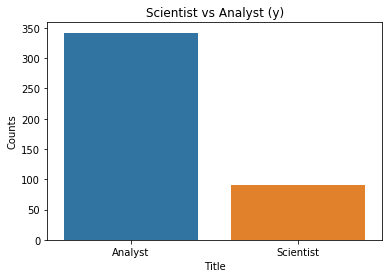

C:\Users\Tan Kian How\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


(433L, 1000L)


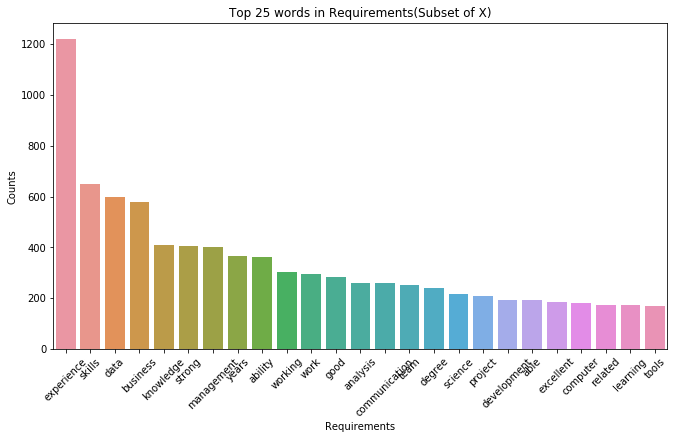

In [64]:
#Check if there are other scientist and analyst in title column
print 'Unique titles', S_A_df['Title'].unique()

#Plot 
plot =  S_A_df['Title'].value_counts()
fig, ax = plt.subplots()
g = sns.barplot(plot.index, plot.values)

plt.title('Scientist vs Analyst (y)')
plt.xlabel('Title')
plt.ylabel('Counts')
plt.show();

#Convert to 1s and 0s 
S_A_df['Title'] = S_A_df['Title'].apply(lambda x: 1 if x == 'Scientist' else 0)

#Count vectorize requirements
Req_cvec = CountVectorizer(S_A_df['Requirements'],)

#initilaize
my_additional_stop_words =('responsibilities','roles','requirements')
Req_cvec = CountVectorizer(stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words),ngram_range = (1,2),max_features = 1000)

#Fit and return a matrix using 'todense'
Req_cvec.fit(S_A_df['Requirements'])
Req_cvec_matrix = Req_cvec.transform(S_A_df['Requirements']).todense()

#return features_names
Req_cvec_columns = Req_cvec.get_feature_names()

#Make into a dataframe
print Req_cvec_matrix.shape
Req_df = pd.DataFrame(Req_cvec_matrix, columns = Req_cvec_columns)

#Check to see most frequent words
most_frequent_words = Req_df.sum().sort_values(ascending =False).head(25)
#print most_frequent_words

#Plot top  25
plot = pd.DataFrame(most_frequent_words)
fig, ax = plt.subplots(figsize=(11,6))
g = sns.barplot(plot.index, plot[0])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.title('Top 25 words in Requirements(Subset of X)')
plt.xlabel('Requirements')
plt.ylabel('Counts')
plt.show();

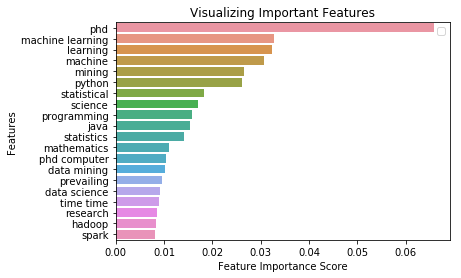

 'Random Forrest's Accuracy: 0.9541284403669725


In [65]:
# Use random forest as they deal well with imbalanced classes
#Define my X and y
X = Req_df
y = S_A_df['Title']

# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

# We have to scale the predictors by Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


#Check out the most important predictors
feature_imp = pd.Series(classifier.feature_importances_,index= X.columns).sort_values(ascending=False)
feature_imp.head(20)

# Creating a bar plot for top 20 features
sns.barplot(x=feature_imp.head(20), y=feature_imp.head(20).index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


print " 'Random Forrest's Accuracy:",metrics.accuracy_score(y_test, y_pred)

** It would seem that these features were useful for the classification task at hand**

In [66]:
from sklearn.metrics import classification_report
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.97      0.98      0.97        87
          1       0.90      0.86      0.88        22

avg / total       0.95      0.95      0.95       109



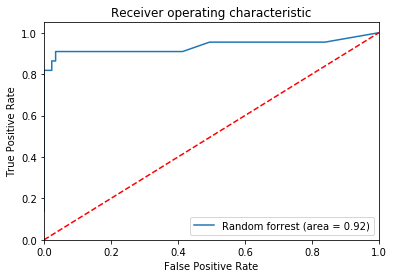

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RF_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random forrest (area = %0.2f)' % RF_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

### {CONCLUSION}:
-  Random Forrest was effective in predicting if a job category was more scientist or more anaylst
-  We also found features which were important in our classifier
-  If i had more time, I would try to intepret which feature contributes to whther a job description was used to predict Scientist or Analyst(Maybe using tree classifier)
- I might also try some boosting techniques